### To do:

- Create a function for each modelisation in order to create them easier.
- Annote the code. 
- Compare the modelization

***

## A. Importing libraries 

In [1]:
import pandas as pd
import numpy as np 
import os 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import matplotlib.pyplot as plt

## B. Importing the CSV 

In [2]:
path_data_set = os.path.join(os.path.abspath(''), 'data_cleaned_reg.csv')
df = pd.read_csv(path_data_set, sep=",")

In [3]:
print(f"The shape of our file is: {df.shape}. ")

The shape of our file is: (13618, 35). 


In [4]:
df.head()

,Unnamed: 0,Price,Number of bedrooms,Livable surface,Kitchen equipment,Number of bathrooms,Number of toilets,Balcony,State of the property,Surface bedroom 1,...,Antwerp,Limburg,Liege,Namur,Hainaut,Luxembourg,West Flanders,East Flanders,Orientation South,Type property
0,0,333500,2,100,2,1,1,0,1,14,...,0,0,0,0,0,0,0,0,0,0
1,1,379000,1,80,2,1,1,0,1,21,...,0,0,0,0,0,0,0,0,0,0
2,2,295000,2,80,1,1,1,0,1,11,...,0,0,0,0,0,0,0,0,1,0
3,3,635000,2,217,2,1,3,0,2,25,...,0,0,0,0,0,0,0,0,0,0
4,4,595000,2,207,1,2,2,0,2,16,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df = df.drop(columns=["Unnamed: 0"])

## C. Correlation visualization

### 1. General HeatMap 

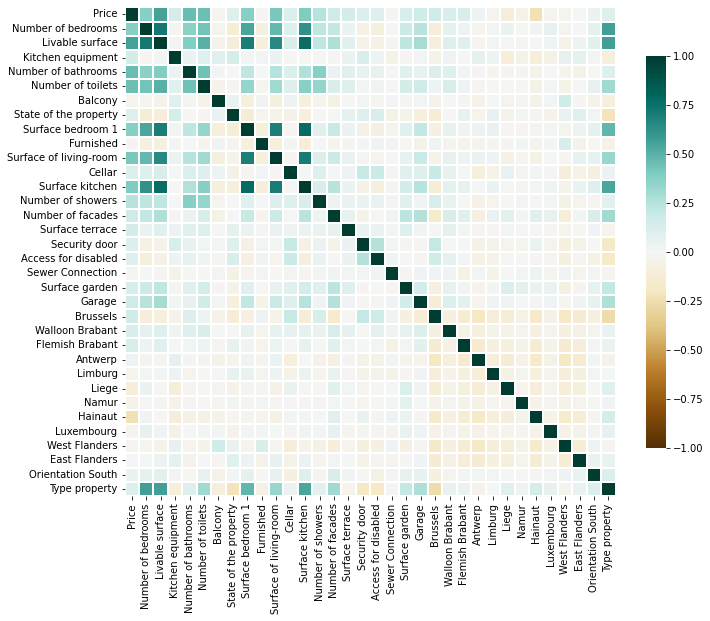

In [6]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), cmap="BrBG", vmin= -1, vmax=1,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

### 2. Correlation value with the Price

In [7]:
df1 = df.corr()[["Price"]].sort_values(by='Price', ascending=False)
df1

,Price
Price,1.000000
Livable surface,0.559402
Number of bathrooms,0.455834
Number of toilets,0.450423
Surface of living-room,0.420558
Surface kitchen,0.402380
Surface bedroom 1,0.380000
Number of bedrooms,0.377230
Number of showers,0.245336
Garage,0.167133


### 3. HeatMap of the highest correlated variables with the Price

Text(0.5, 1.0, 'Highest correlated features with Price (> |0.2|)')

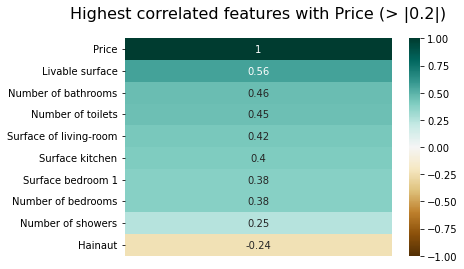

In [8]:
df_corr = df1[(df1["Price"] > 0.2) | (df1["Price"] < -0.2)]
heatmap = sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG', yticklabels=True, xticklabels=False)
heatmap.set_title("Highest correlated features with Price (> |0.2|)", fontdict={'fontsize':16}, pad=20)

### 4. HeatMap between the highest correlated to price variables

In [9]:
df_highest_corr = df[["Price",
                  "Livable surface",
                  "Number of bathrooms",
                  "Number of toilets",
                  "Surface of living-room",
                  "Surface kitchen",
                  "Surface bedroom 1",
                  "Number of bedrooms",
                  "Number of showers",
                  "Hainaut"]]

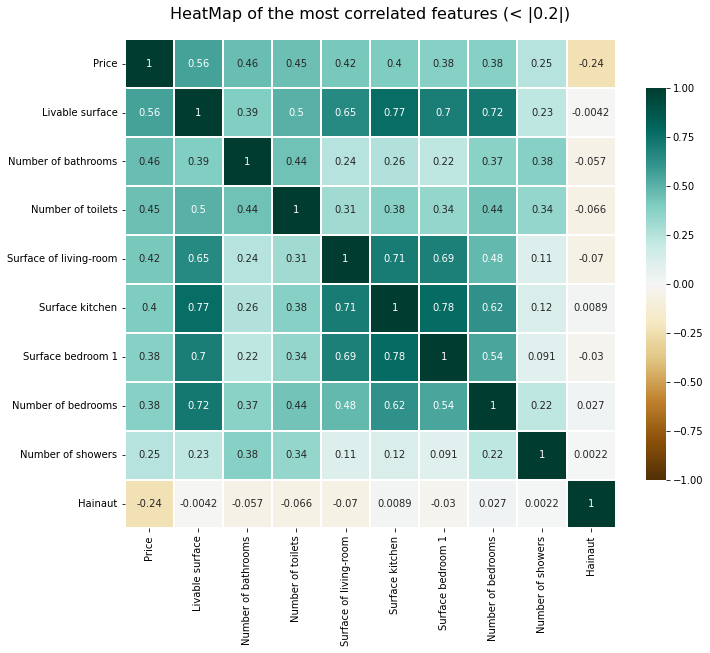

In [10]:
fig, ax = plt.subplots(figsize=(11, 9))

heatmap = sns.heatmap(df_highest_corr.corr(), cmap="BrBG", vmin= -1, vmax=1,
           linewidth=0.3, cbar_kws={"shrink": .8}, annot=True)
heatmap.set_title("HeatMap of the most correlated features (< |0.2|)", fontdict={'fontsize':16}, pad=20)
plt.show()

## D. Linear regressions

### 1. Simple linear regression 

We decided to do a linear regression using Livable surface as a single independant variable because it's the most correlated variable.

In [56]:
X = df["Livable surface"].to_numpy()
X = X.reshape(-1,1)
y = df["Price"].to_numpy()
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(13618, 1)
(13618, 1)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [58]:
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)
regr.score(X_test, y_test)

0.3051331802747296

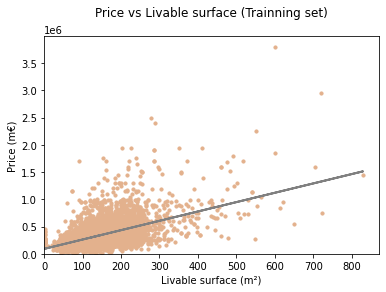

In [77]:
plt.scatter(X_train, y_train, color="#E3B18D", s=10)
plt.plot(X_train, regr.predict(X_train), color='gray', linewidth = 2)
plt.xlabel("Livable surface (m²)")
plt.ylabel("Price (m€)")
plt.title("Price vs Livable surface (Trainning set)", pad=20)
plt.ylim(ymin=0)
plt.xlim(xmin = 0)
plt.show()

### 2. Multiple lineair regression for the highest correlated

We are doing a lineair regression using the most correlated independant variable to the price. 

Number of independant variables = **9**

In [15]:
X = df_highest_corr.drop(columns=['Price']).to_numpy()
y = df["Price"].to_numpy()
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(13618, 9)
(13618, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [17]:
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)
regr.score(X_test, y_test)

0.48333305040782326

### 3. Multiple linear regression for all variables

Number of independant variables = **33**

In [107]:
X = df.drop(columns=['Price']).to_numpy()
y = df["Price"].to_numpy()
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(13618, 33)
(13618, 1)


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [109]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
regr.score(X_test, y_test)

0.5375213400393971

Creating a visualization with scatter and plot line. 

C:\Users\alebe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


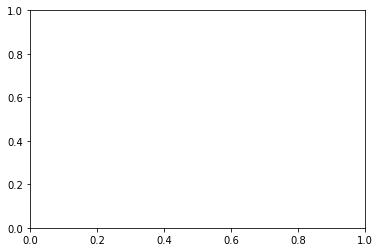

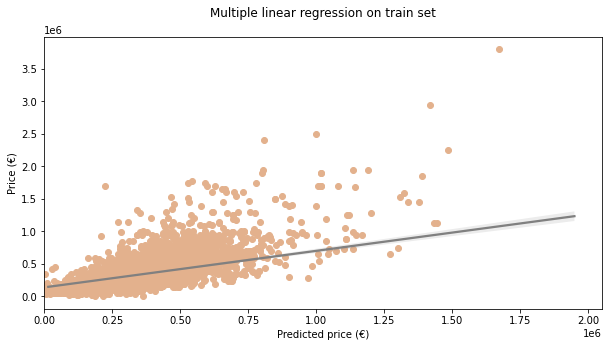

In [128]:
fig, ax = plt.subplots()

plt.figure(figsize=(10,5))
# plt.scatter(y_pred, y_test, color="black", label="Test set")
plt.scatter(regr.predict(X_train), y_train, color="#E3B18D", label= "Train set")
# sns.scatterplot(y_test, y_test_predict, c=np.arange(len(y_test)), cmap="GnBu")
sns.regplot(y_test, y_pred, data=df, scatter=False, color="gray")
plt.title("Multiple linear regression on train set", pad = 20)
plt.ylabel("Price (€)")
plt.xlabel("Predicted price (€)")
plt.xlim(xmin=0)
plt.show()

#### Using the statsmodels libary to get more data

In [21]:
y_pred = regr.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.5206224667386212

In [22]:
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

132114.1443463813

In [23]:
regr.intercept_

array([-136143.37476467])

In [24]:
olsmod = sm.OLS(y,X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     510.9
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:27:00   Log-Likelihood:            -1.7922e+05
No. Observations:               13618   AIC:                         3.585e+05
Df Residuals:                   13585   BIC:                         3.588e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           301.0476   1584.117      0.190      0.849   -2804.041    3406.136
x2          1432.3837     36.439     39.309      0.000    1360.958    1503.810
x3          1.803e+04   2108.061      8.551      0.000    1.39e+04    2.22e+04
x4          6.971e+04   2971.125     23.462      0.000    6.39e+04    7.55e+04
x5           3.67e+04   2223.822     16.502      0.000    3.23e+04    4.11e+04
x6         -2.704e+04   7359.160     -3.674      0.000   -4.15e+04   -1.26e+04
x7          1.976e+04   1163.748     16.980      0.000    1.75e+04     2.2e+04
x8           416.8762    278.649      1.496      0.135    -129.314     963.066
x9          3.192e+04   7285.470      4.381      0.000    1.76e+04    4.62e+04
x10          606.6952    116.835      5.193      0.000     377.683     835.708
x11        -2186.6172   2721.779     -0.803      0.422   -7521.682    3148.448
x12           13.7420    391.570      0.035      0.972    -753.790     781.274
x13         1.214e+04   4730.431      2.567      0.010    2872.634    2.14e+04
x14         1.938e+04   1634.551     11.854      0.000    1.62e+04    2.26e+04
x15          269.0492     35.073      7.671      0.000     200.302     337.797
x16         3.912e+04   5331.902      7.336      0.000    2.87e+04    4.96e+04
x17         2.253e+04   4479.253      5.029      0.000    1.37e+04    3.13e+04
x18        -6537.3786   6463.903     -1.011      0.312   -1.92e+04    6132.767
x19           23.4965      4.649      5.055      0.000      14.385      32.608
x20         1.235e+04   2473.007      4.992      0.000    7497.941    1.72e+04
x21        -5.954e+04   9867.559     -6.034      0.000   -7.89e+04   -4.02e+04
x22        -8.999e+04   1.15e+04     -7.795      0.000   -1.13e+05   -6.74e+04
x23        -8.694e+04   9999.753     -8.694      0.000   -1.07e+05   -6.73e+04
x24        -1.042e+05   9781.007    -10.654      0.000   -1.23e+05    -8.5e+04
x25         -1.54e+05   1.05e+04    -14.709      0.000   -1.75e+05   -1.33e+05
x26        -1.877e+05   1.02e+04    -18.351      0.000   -2.08e+05   -1.68e+05
x27        -1.762e+05   1.31e+04    -13.463      0.000   -2.02e+05   -1.51e+05
x28        -2.191e+05   9919.366    -22.092      0.000   -2.39e+05      -2e+05
x29        -1.735e+05   1.25e+04    -13.890      0.000   -1.98e+05   -1.49e+05
x30        -1.155e+05   9860.185    -11.713      0.000   -1.35e+05   -9.62e+04
x31        -1.326e+05   1.01e+04    -13.074      0.000   -1.52e+05   -1.13e+05
x32          828.6381   2923.114      0.283      0.777   -4901.071    6558.347
x33         -6.46e+04   3202.536    -20.172      0.000   -7.09e+04   -5.83e+04
==============================================================================
Omnibus:                    10025.466   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           440804.781
Sk

***We are seeing that some of the variable are not significatifs because their p-value is > 0.05.***

In [25]:
list_col = list(df.drop(columns=["Price"]))
index_remove = [0,7,10,11,17,31]
columns_removed = []
for x in index_remove:
    columns_removed.append(list_col[x])
columns_removed

['Number of bedrooms',
 'Surface bedroom 1',
 'Cellar',
 'Surface kitchen',
 'Sewer Connection',
 'Orientation South']

In [26]:
len(columns_removed)

6

We are creating a new dataframe without the variables with a p-value > 0.05

In [27]:
df_all_res = df.drop(columns=columns_removed)
df_all_res.shape

(13618, 28)

### 4. Multiplie linear regressions for variables p-value > 0.05

Number of independant variable : **27**

In [28]:
X = df_all_res.drop(columns=['Price']).to_numpy()
y = df_all_res["Price"].to_numpy()
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(13618, 27)
(13618, 1)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [30]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
regr.score(X_test, y_test)

0.5420919389514158

In [31]:
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

136546.86450483496

In [32]:
olsmod = sm.OLS(y,X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     628.7
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:27:00   Log-Likelihood:            -1.7922e+05
No. Observations:               13618   AIC:                         3.585e+05
Df Residuals:                   13591   BIC:                         3.587e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1450.4047     30.560     47.461      0.000    1390.503    1510.307
x2          1.823e+04   2104.319      8.664      0.000    1.41e+04    2.24e+04
x3          6.963e+04   2936.411     23.713      0.000    6.39e+04    7.54e+04
x4          3.678e+04   2218.020     16.584      0.000    3.24e+04    4.11e+04
x5         -2.812e+04   7333.390     -3.834      0.000   -4.25e+04   -1.37e+04
x6          1.978e+04   1159.129     17.066      0.000    1.75e+04    2.21e+04
x7           3.15e+04   7278.507      4.327      0.000    1.72e+04    4.58e+04
x8           693.7211    101.105      6.861      0.000     495.541     891.902
x9          1.155e+04   4712.090      2.451      0.014    2314.370    2.08e+04
x10         1.938e+04   1625.206     11.927      0.000    1.62e+04    2.26e+04
x11          268.7086     35.051      7.666      0.000     200.003     337.414
x12         3.835e+04   5272.869      7.273      0.000     2.8e+04    4.87e+04
x13         2.183e+04   4435.477      4.921      0.000    1.31e+04    3.05e+04
x14           23.0671      4.633      4.979      0.000      13.986      32.149
x15         1.211e+04   2464.143      4.915      0.000    7280.000    1.69e+04
x16        -6.403e+04   7300.022     -8.771      0.000   -7.83e+04   -4.97e+04
x17        -9.461e+04   9424.404    -10.039      0.000   -1.13e+05   -7.61e+04
x18        -9.109e+04   7771.310    -11.721      0.000   -1.06e+05   -7.59e+04
x19        -1.082e+05   7208.181    -15.004      0.000   -1.22e+05    -9.4e+04
x20        -1.575e+05   8289.744    -19.001      0.000   -1.74e+05   -1.41e+05
x21        -1.921e+05   7831.260    -24.534      0.000   -2.07e+05   -1.77e+05
x22        -1.807e+05   1.13e+04    -16.053      0.000   -2.03e+05   -1.59e+05
x23        -2.236e+05   7378.871    -30.305      0.000   -2.38e+05   -2.09e+05
x24        -1.774e+05   1.08e+04    -16.461      0.000   -1.99e+05   -1.56e+05
x25        -1.196e+05   7296.315    -16.390      0.000   -1.34e+05   -1.05e+05
x26        -1.366e+05   7828.429    -17.455      0.000   -1.52e+05   -1.21e+05
x27        -6.356e+04   3016.555    -21.070      0.000   -6.95e+04   -5.76e+04
==============================================================================
Omnibus:                     9997.404   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           436391.539
Skew:                           3.065   Prob(JB):                         0.00
Kurtosis:                      30.046   Cond. No.                     5.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## E. Polynominal regression

### 1. Polynominal simple regression

In [33]:
degree = 3

In [34]:
X = df["Livable surface"].to_numpy()
X = X.reshape(-1,1)
y = df["Price"].to_numpy()
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(13618, 1)
(13618, 1)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [36]:
polyreg=make_pipeline(
    PolynomialFeatures(degree),
    LinearRegression(),
)

In [37]:
polyreg.fit(X,y)
polyreg.score(X_test, y_test)

0.34476808988207575

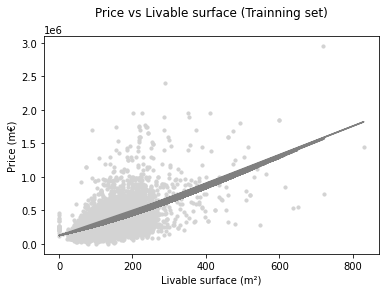

In [38]:
plt.scatter(X_train, y_train, color="lightGray", s=10)
plt.plot(X_train, polyreg.predict(X_train), color='gray')
plt.xlabel("Livable surface (m²)")
plt.ylabel("Price (m€)")
plt.title("Price vs Livable surface (Trainning set)", pad=20)
plt.show()

### 2. Polynomial multiple regression (degree = 2)

In [94]:
degree = 2

In [95]:
X = df_all_res.drop(columns=['Price']).to_numpy()
y = df_all_res["Price"].to_numpy()
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(13618, 27)
(13618, 1)


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [97]:
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression(),)
polyreg.fit(X,y)
y_pred = polyreg.predict(X_test)
polyreg.score(X_test, y_test)

0.6305658355970445

In [98]:
polyreg.score(X_train, y_train)

0.6806563429873785

In [43]:
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

106573.401978051

### 3. Polynomial multiple regression (degree = 3)

In [99]:
degree = 3

In [100]:
X = df_all_res.drop(columns=['Price']).to_numpy()
y = df_all_res["Price"].to_numpy()
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(13618, 27)
(13618, 1)


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [102]:
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression(),)
polyreg.fit(X,y)
y_pred = polyreg.predict(X_test)
polyreg.score(X_test, y_test)

0.7544429172906542

In [103]:
polyreg.score(X_train, y_train)

0.7944925573302413

In [105]:
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

86887.34647798745

### 4. Polynominal multiple regression (degree = 4)

In [49]:
degree = 4

In [50]:
X = df_all_res.drop(columns=['Price']).to_numpy()
y = df_all_res["Price"].to_numpy()
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(13618, 27)
(13618, 1)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
# polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression(),)
# polyreg.fit(X,y)
# y_pred = polyreg.predict(X_test)
# polyreg.score(X_test, y_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

86887.34647798745

## F. Creating an histogram 

In [54]:
deg = ["1","2","3","4"]
r = [0.52,0.68,0.79,0.89]
error = [235726,106571,86887, 72408]

df_tab = pd.DataFrame(list(zip(deg, r, error)), columns=["Degree", "Rsqr", "Error"])
df_tab

,Degree,Rsqr,Error
0,1,0.52,235726
1,2,0.63,106571
2,3,0.75,86887
3,4,0.89,72408


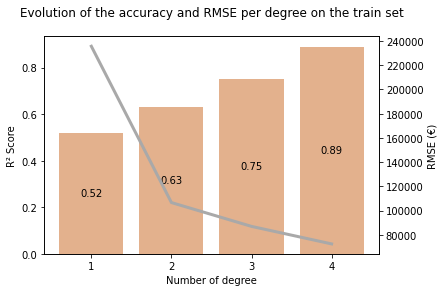

In [104]:
fig, ax_1 = plt.subplots()
ax_2 = ax_1.twinx()
p1 = ax_1.bar(df_tab["Degree"], df_tab["Rsqr"], width=0.8, color= '#E3B18D')
p2 = ax_2.plot(df_tab["Degree"], df_tab["Error"], color="Darkgray", linewidth = 3)


ind = np.arange(len(r))
ax_1.set_title('Evolution of the accuracy and RMSE per degree on the train set', pad = 20)
ax_1.set_ylabel('R² Score')
ax_1.set_xlabel('Number of degree')
ax_2.set_ylabel('RMSE (€)')
ax_1.bar_label(ax.containers[0],label_type='center')


plt.show()